# Exercise 2.3 - Complex ML Models and Keras pt.2

This script is organised using the following structure:
1. Importing Data and Libraries
2. Data Wrangling
       Reduce data to single decade
       Checking total entries for each weather station
       Dropping unnecessary columns
       Reshaping and Remodeling
3. Random Forest Model
4. Feature Importance
5. Modeling the 3 Most Influential Weather Stations and Their Features
   
    - Madrid
   
    - Budapest
   
    - Ljubljana

## 1. Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import plot_tree

In [2]:
# Set path
path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 2'

In [3]:
# Import cleaned data
df_weather = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned_Weather_Data_with_dates.csv'))
df_weather.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
# Check
df_weather

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0                  6.5             0.8  ...                 4.9   
1                  6.1             3.3  ...                 5.0   
2                  8.5             5.1  ...                 4.1   
3                  6.3             3.8  ...                 2.3   
4                  3.0            -0.7  ...                 4.3   
...                ...             ...  ...                 ...   
22945             15.9            11.4  ...                14.2   
22946             16.7            14.3  ...                14.3   
22947             16.7            13.1  ...                14.4   
22948             15.4            11.6  ...                12.4   
22949             13.5             9.9  ...                12.6   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                         5               0.88             1.0003   
1                         7               0.91             1.0007   
2                         7               0.91             1.0096   
3                         7               0.86             1.0184   
4                         3               0.80             1.0328   
...                     ...                ...                ...   
22945                     5               0.82             1.0142   
22946                     5               0.82             1.0142   
22947                     5               0.82             1.0142   
22948                     5               0.82             1.0142   
22949                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                           0.45                    0.34                4.7   
1                           0.25                    0.84                0.7   
2                           0.17                    0.08                0.1   
3                           0.13                    0.98                0.0   
4                           0.46                    0.00                5.7   
...                          ...                     ...                ...   
22945                       1.13                    0.41  

In [5]:
# Import pleasant weather answers
df_answers = pd.read_csv(os.path.join(path, '02 Data', 'Pleasant_Weather_Prediction_Answers.csv'))

In [6]:
# Check
df_answers

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [7]:
df_answers

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

## 2. Data Wrangling

In [8]:
# Reduce weather data to a single decade (2000 to 2009)
df_decade = df_weather[(df_weather['DATE'].astype(str).str[:4] >= '2000') & (df_weather['DATE'].astype(str).str[:4] <= '2009')]

# Check
df_decade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   
14611  20000102      1                  8            0.87          1.0318   
14612  20000103      1                  5            0.81          1.0314   
14613  20000104      1                  7            0.79          1.0262   
14614  20000105      1                  5            0.90          1.0246   
...         ...    ...                ...             ...             ...   
18258  20091227     12                  7            0.80          1.0118   
18259  20091228     12                  7            0.82          1.0084   
18260  20091229     12                  7            0.92          1.0028   
18261  20091230     12                  8            0.92          0.9979   
18262  20091231     12                  7            0.93          0.9958   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   
...                       ...                  ...             ...   
18258                    0.37                 0.18             2.3   
18259                    0.28                 0.42             0.3   
18260                    0.22                 1.68             0.2   
18261                    0.18                 1.54             0.0   
18262                    0.17                 0.57             0.1   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
14610              2.9             1.6  ...                 0.7   
14611              3.6             2.7  ...                 2.0   
14612              2.2             0.1  ...                 2.8   
14613              3.9             0.5  ...                 4.6   
14614              6.0             3.8  ...                 2.9   
...                ...             ...  ...                 ...   
18258              1.0            -3.9  ...                -2.7   
18259              3.2             1.0  ...                 2.4   
18260              4.5             2.4  ...                 0.8   
18261              8.5             7.5  ...                -7.4   
18262              6.6             4.3  ...                -6.5   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
14610                     6               0.89             1.0235   
14611                     8               0.92             1.0177   
14612                     4               0.79             1.0154   
14613                     6               0.76             1.0099   
14614                     7               0.81             0.9957   
...                     ...                ...                ...   
18258                     4               0.72             1.0039   
18259                     8               0.70             0.9975   
18260                     8               0.88             0.9866   
18261                     8               0.87             0.9862   
18262                     6               0.80             1.0029   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
14610                       0.22                    0.10                0.7   
14611                       0.13                    0.42                0.0   
14612                       0.22                    1.05                1.2   
14613                       0.36                    0.34                3.5   
14614                       0.12                    0.33                0.0   
...                          ...                     ...                ...   
18258                       0.37                    0.01  

In [9]:
# Reduce answers data to a single decade (2000 to 2009)
answers_decade = df_answers[(df_answers['DATE'].astype(str).str[:4] >= '2000') & (df_answers['DATE'].astype(str).str[:4] <= '2009')]

# Check
answers_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   
14611  20000102                       0                          0   
14612  20000103                       0                          0   
14613  20000104                       0                          0   
14614  20000105                       0                          0   
...         ...                     ...                        ...   
18258  20091227                       0                          0   
18259  20091228                       0                          0   
18260  20091229                       0                          0   
18261  20091230                       0                          0   
18262  20091231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
...                          ...                      ...   
18258                          0                        0   
18259                          0                        0   
18260                          0                        0   
18261                          0                        0   
18262                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   
...                            ...                        ...   
18258                            0                          0   
18259                            0                          0   
18260                            0                          0   
18261                            0                          0   
18262                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   
...                        ...                         ...   
18258                        0                           0   
18259                        0                           0   
18260                        0                           0   
18261                        0                           0   
18262                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   
...                            ...                      ...   
18258                            0                        0   
18259                            0                        0   
18260                            0                        0   
18261                            0                        0   
18262                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0    

### Check total entries for each station

In [10]:
# Create set of unique stations
unique_stations = set([col.split('_')[0] for col in df_decade.columns if '_' in col])
# Check
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [11]:
# Create dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select all columns for current station
    station_columns = [col for col in df_decade.columns if col.startswith(station)]
    # Count non-missing entries across all columns
    station_frequencies[station] = df_decade[station_columns].notna().sum().sum()
    # First .sum() adds non-missing values for each column (makes list), second .sum() adds list together

# Print the frequency of entries for each station
for station, frequency in station_frequencies.items():
    print(f"{station}: {frequency} entries")

DEBILT: 32877 entries
LJUBLJANA: 32877 entries
VALENTIA: 32877 entries
HEATHROW: 32877 entries
MAASTRICHT: 32877 entries
BUDAPEST: 32877 entries
BASEL: 32877 entries
BELGRADE: 32877 entries
KASSEL: 32877 entries
MUNCHENB: 32877 entries
DUSSELDORF: 32877 entries
MADRID: 32877 entries
SONNBLICK: 32877 entries
STOCKHOLM: 32877 entries
OSLO: 32877 entries


All stations have the same number of entries

### Dropping Unnecessary Columns

In [12]:
df_decade = df_decade.drop(columns=["DATE", "MONTH"])
df_decade.shape # should have 135 columns

(3653, 135)

In [13]:
answers_decade = answers_decade.drop(columns = ['DATE'])
answers_decade.shape # Should have 15 columns

(3653, 15)

### Reshaping and Remodeling

In [14]:
# Start with some conventional renamings
X = df_decade
y = answers_decade

# Check shapes
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [15]:
# Reshape y so that its shape is (3653, )
y = y.max(axis = 1)
print(y.shape)

(3653,)


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
# Check Shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(914, 135) (914,)


## 3. Random Forest Model

In [18]:
# Create Random Forest classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth = 10)  
  
# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [19]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [19]:
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Using metrics module for accuracy calculation
print("Model Accuracy: ", (metrics.accuracy_score(y_test, y_pred))*100,'%')

Model Accuracy:  95.29540481400439 %


In [20]:
# Check unique values in y
unique_classes = np.unique(y)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


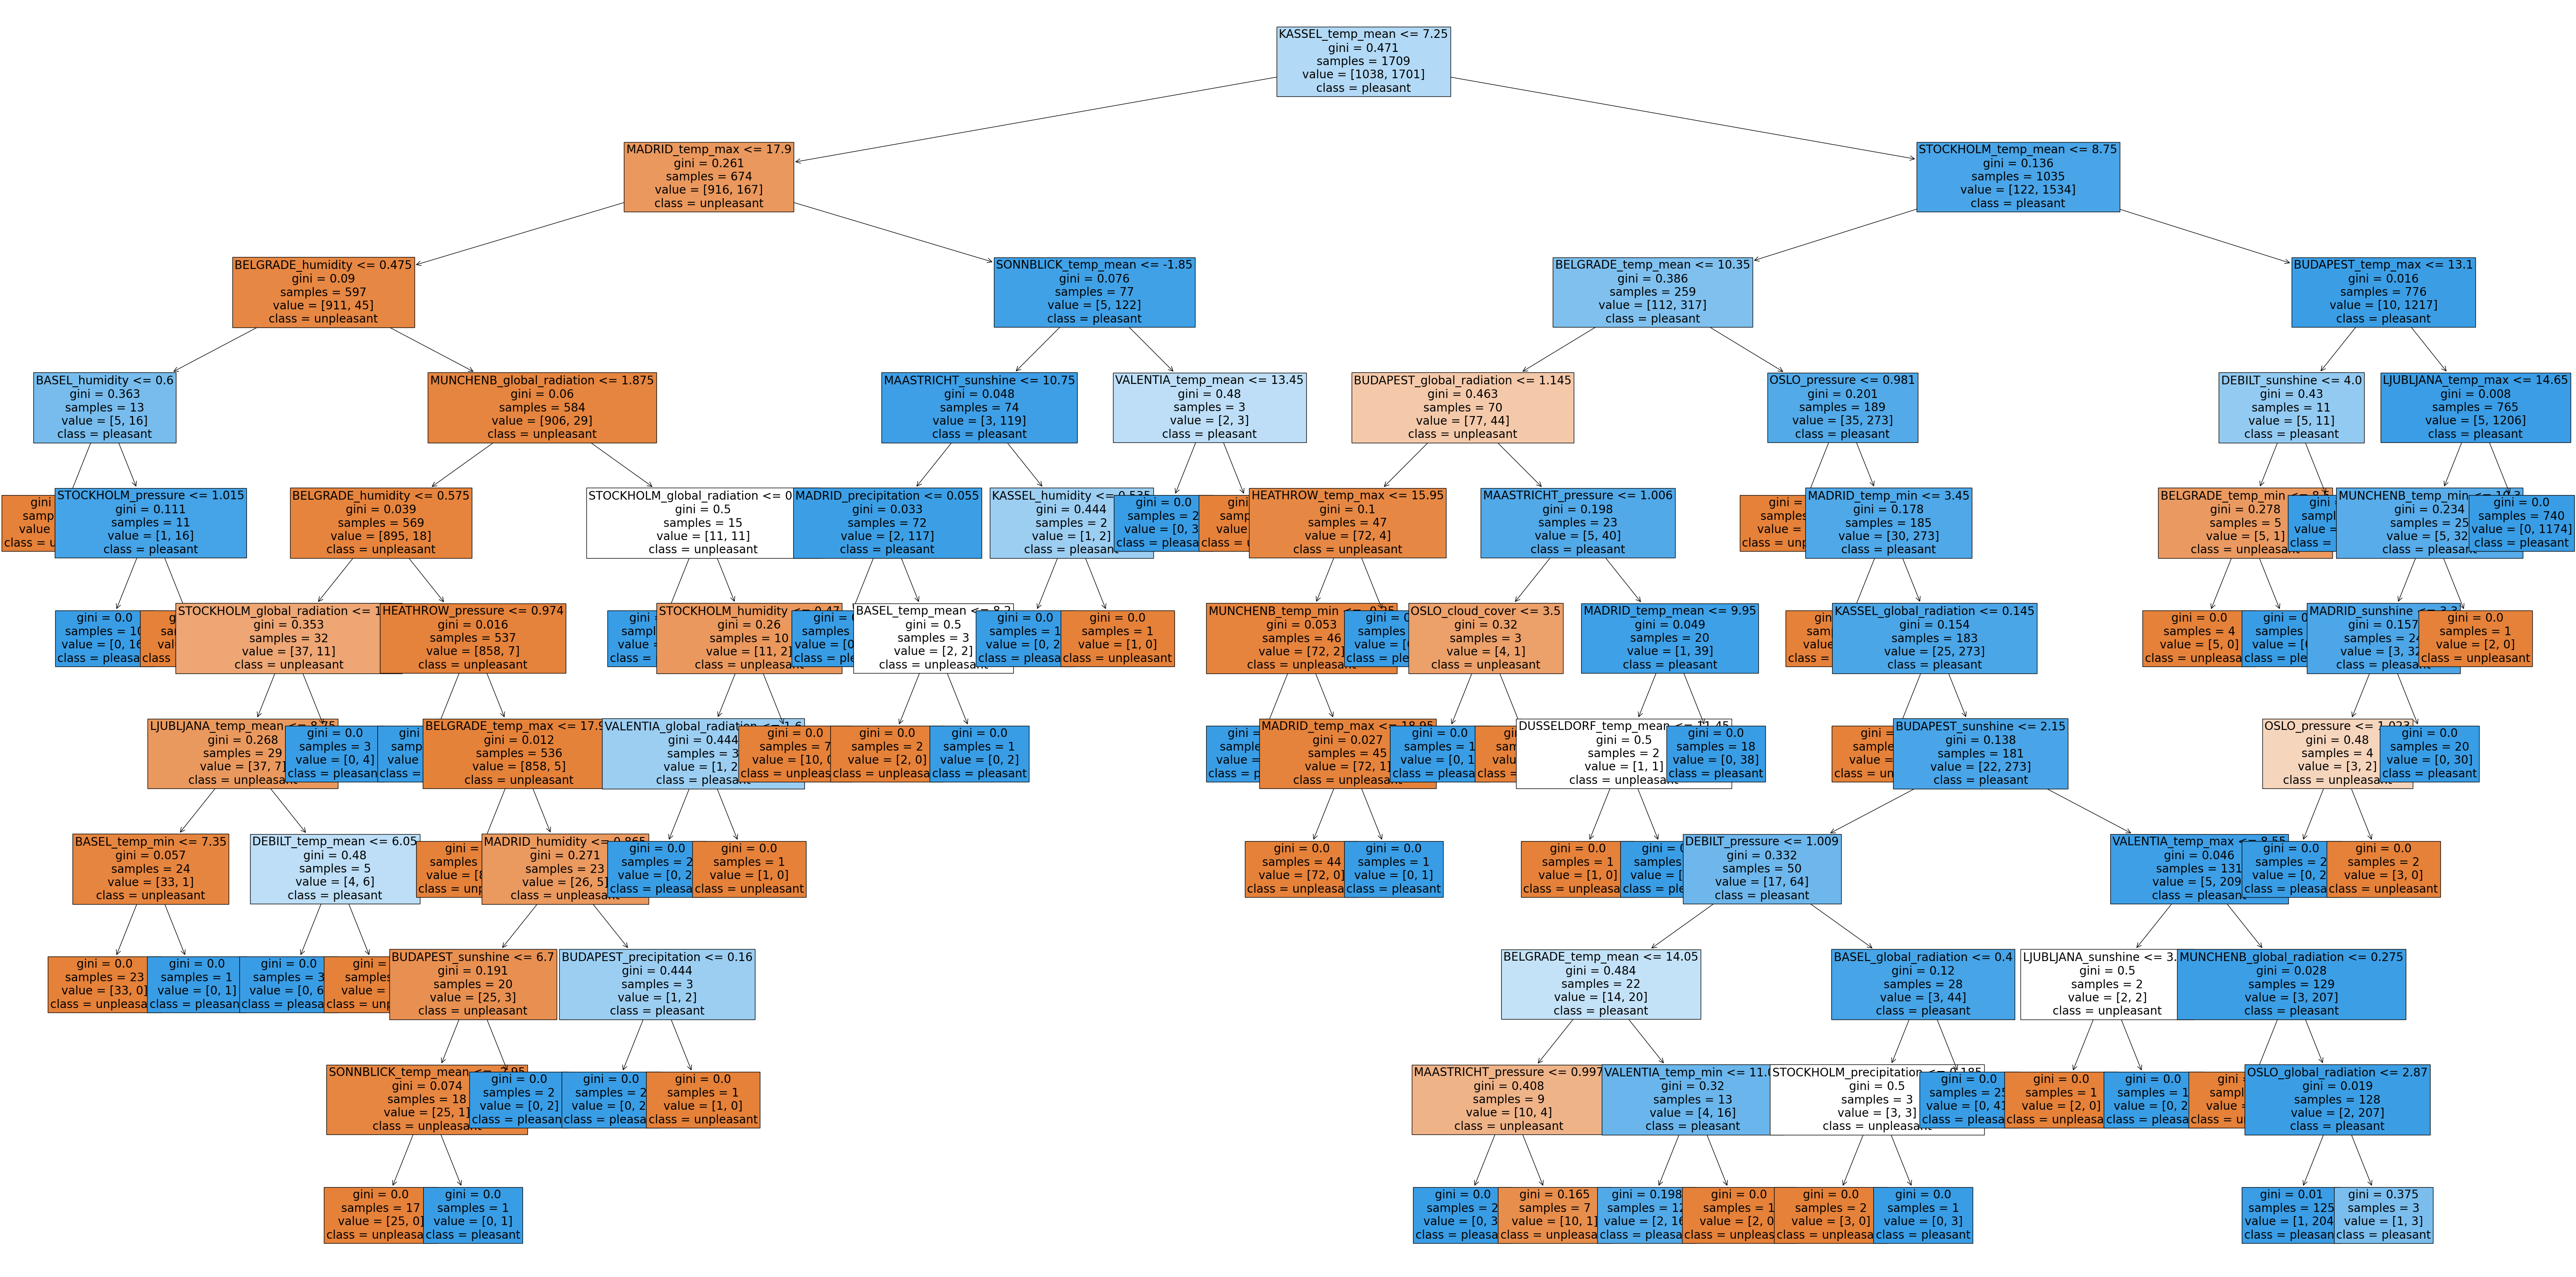

In [21]:
# Define class_names
class_names = ['unpleasant', 'pleasant']

# Plot random forest for tree 9
tree_9 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[9], fontsize = 20, feature_names=df_decade.columns, class_names = class_names, filled=True)
plt.show();

In [22]:
# Save tree 9
tree_9.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'tree_9_random_forest_2000s.png'),bbox_inches='tight')

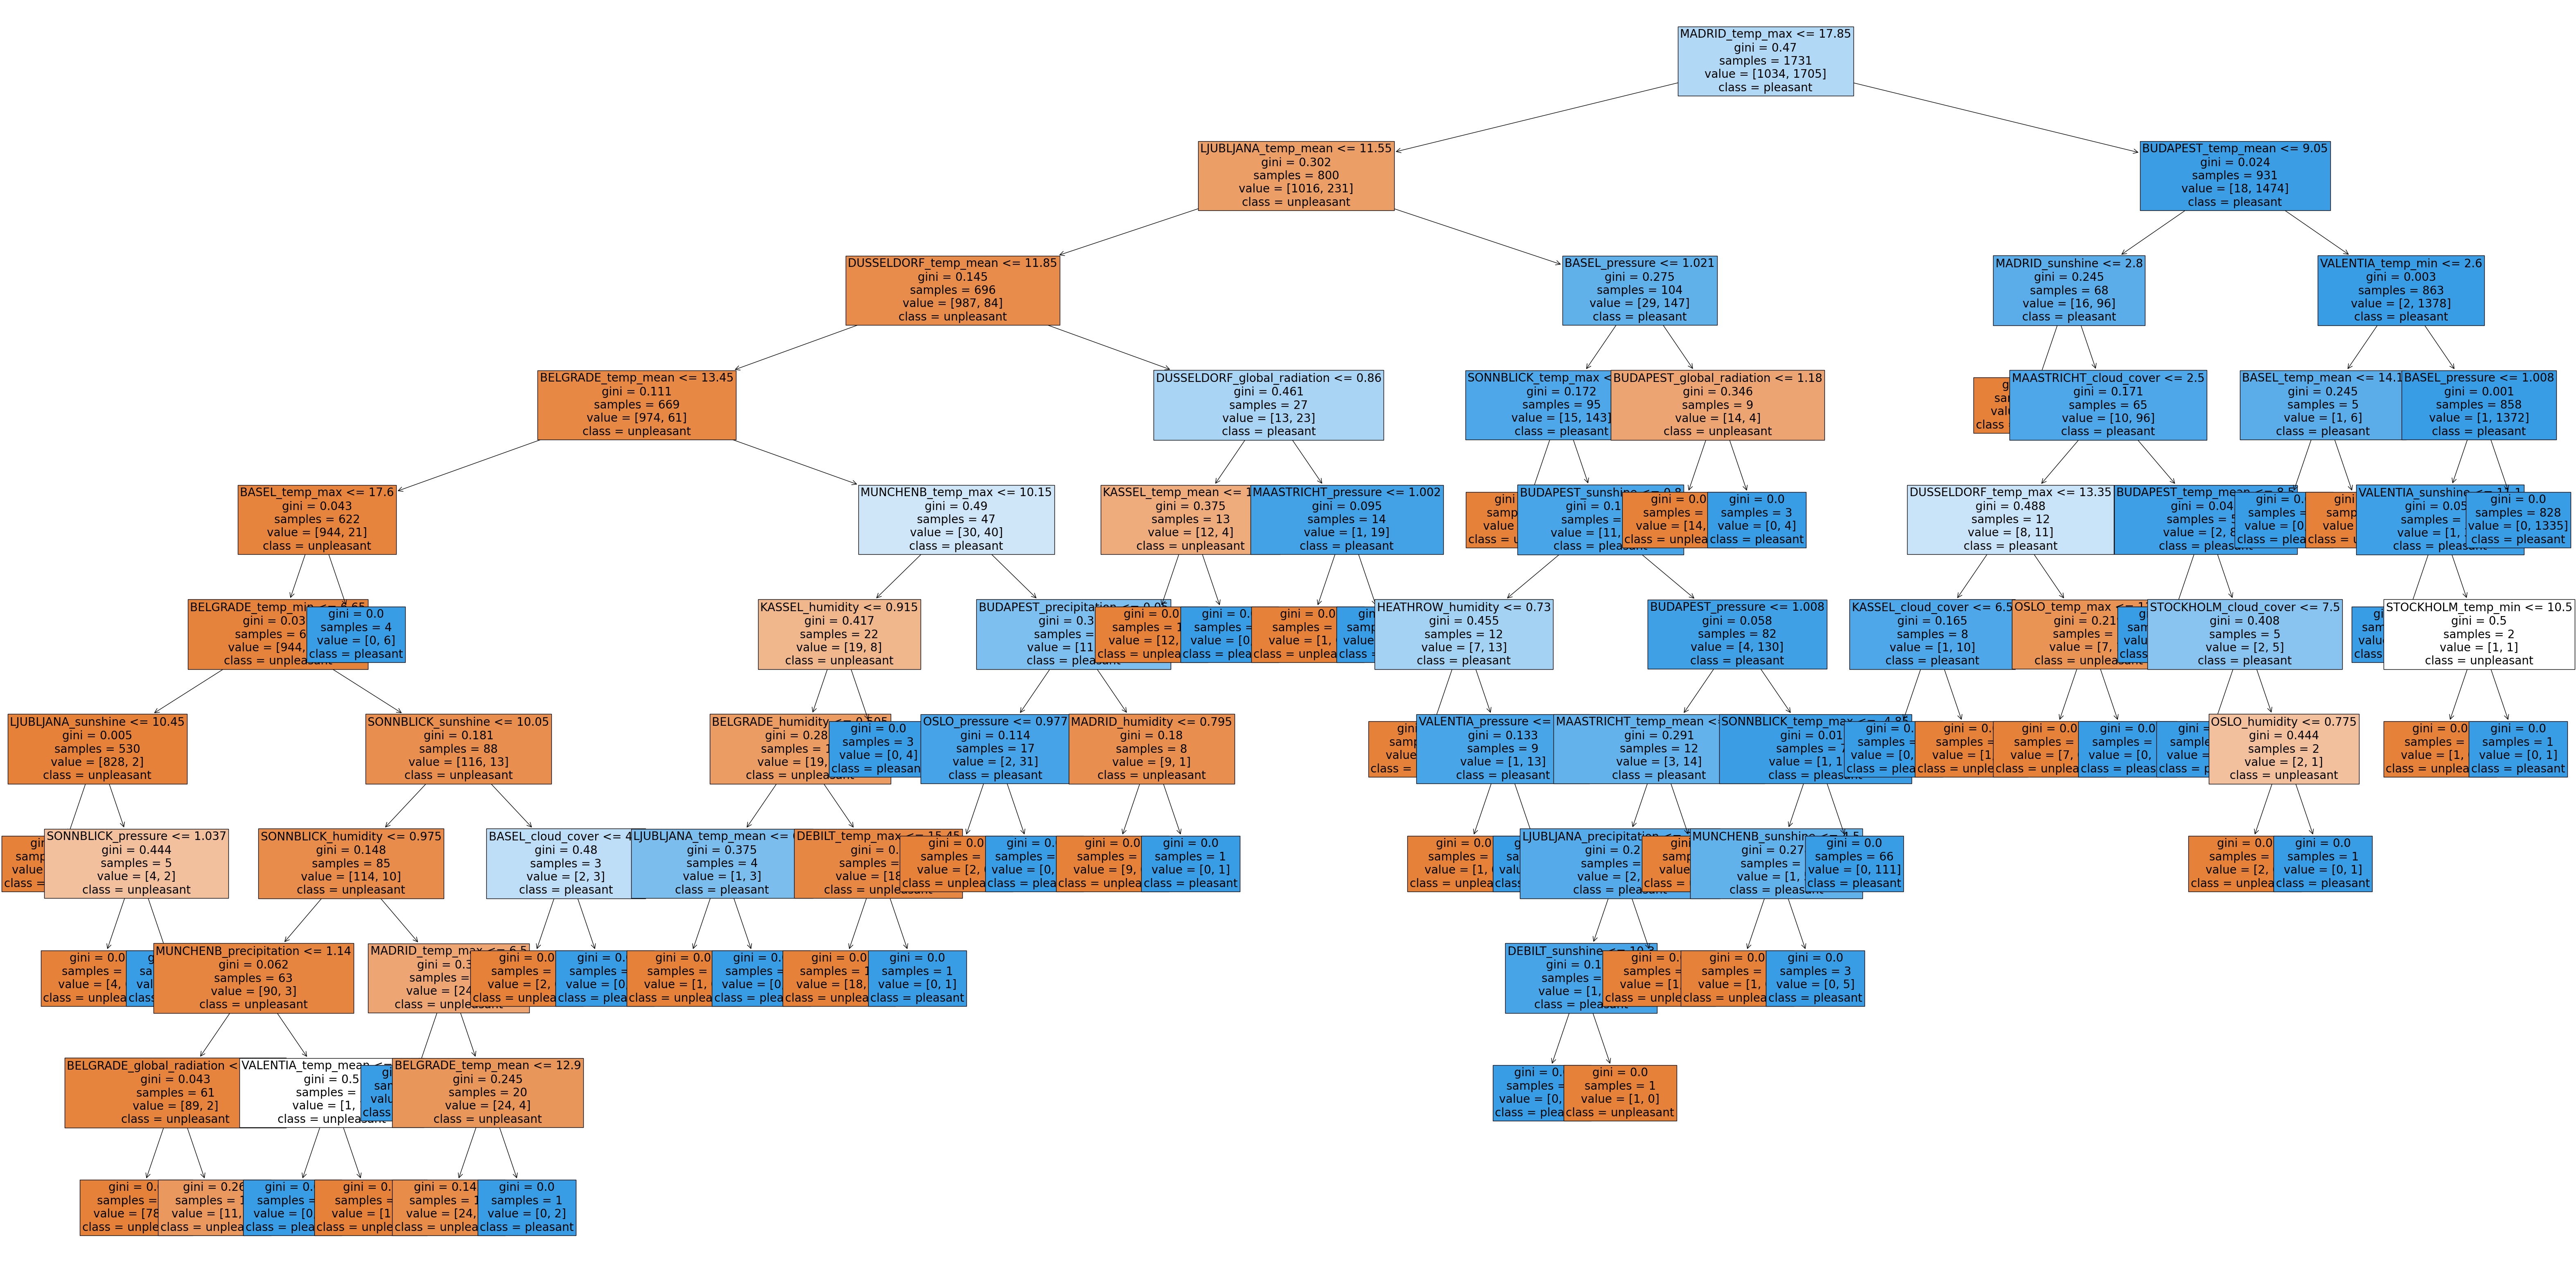

In [23]:
# Plot random forest for tree 18
tree_18 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[18], fontsize = 20, feature_names=df_decade.columns, class_names = class_names, filled=True)
plt.show();

In [24]:
# Save tree 18
tree_18.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'tree_18_random_forest_2000s.png'),bbox_inches='tight')

## 4. Feature Importance

In [25]:
np.set_printoptions(threshold=np.inf)
feature_importances = clf.feature_importances_
print(feature_importances)
print(feature_importances.shape)

[0.00047938 0.00106849 0.00138098 0.00236673 0.00073839 0.00090708
 0.0223452  0.00762022 0.01841129 0.00061465 0.00258745 0.00131975
 0.01571908 0.00282621 0.0023501  0.0573071  0.00253659 0.01806777
 0.00066827 0.00177039 0.00158723 0.01464828 0.00099952 0.00222573
 0.06279485 0.01129923 0.06129796 0.00055149 0.00072034 0.00110205
 0.00473194 0.00042748 0.00105239 0.0028824  0.0013919  0.01025224
 0.00039033 0.00088627 0.00088993 0.00240258 0.00066412 0.0012027
 0.03775634 0.0012974  0.00597166 0.00054368 0.0011345  0.00122122
 0.00326998 0.00030609 0.00050334 0.01496443 0.00194686 0.00913983
 0.00044253 0.00251246 0.00137085 0.00676105 0.00063399 0.00104643
 0.02158408 0.00186557 0.04046342 0.00043282 0.00127126 0.0012
 0.00388766 0.00097201 0.00144115 0.06639401 0.00781969 0.04173707
 0.00039108 0.00075232 0.00103021 0.00365138 0.0006023  0.00106472
 0.01620526 0.00148507 0.01100704 0.00116935 0.00238304 0.00326479
 0.01039529 0.00168219 0.0045487  0.04272277 0.01422529 0.10504549


In [26]:
# Must reshape feature_importances to (1, 15, 9)
reshaped_importances = feature_importances.reshape(-1, 15, 9) # 15 weather stations and 9 weather observations
print(reshaped_importances.shape)

(1, 15, 9)


In [27]:
# Collapse shape into one observation for each weather station
collapsed_importances = np.sum(reshaped_importances[0], axis = 1)

# Check
print(collapsed_importances.shape)
print(collapsed_importances)

(15,)
[0.05531776 0.10332868 0.15729145 0.02311224 0.05146133 0.03302993
 0.0766804  0.12515568 0.0361894  0.18543692 0.05958512 0.02102999
 0.0176565  0.03410908 0.02061552]


In [28]:
# Turn importances into a DataFrame with their associated weather stations
## Start by creating a list of weather stations
weather_stations = sorted(list(set([col.split('_')[0] for col in answers_decade])))

importance_df = pd.DataFrame({'Weather Station' : weather_stations, 'Importance' : collapsed_importances}).sort_values(by = 'Importance', ascending = False)
importance_df

Weather Station  Importance
9           MADRID    0.185437
2         BUDAPEST    0.157291
7        LJUBLJANA    0.125156
1         BELGRADE    0.103329
6           KASSEL    0.076680
10        MUNCHENB    0.059585
0            BASEL    0.055318
4       DUSSELDORF    0.051461
8       MAASTRICHT    0.036189
13       STOCKHOLM    0.034109
5         HEATHROW    0.033030
3           DEBILT    0.023112
11            OSLO    0.021030
14        VALENTIA    0.020616
12       SONNBLICK    0.017657

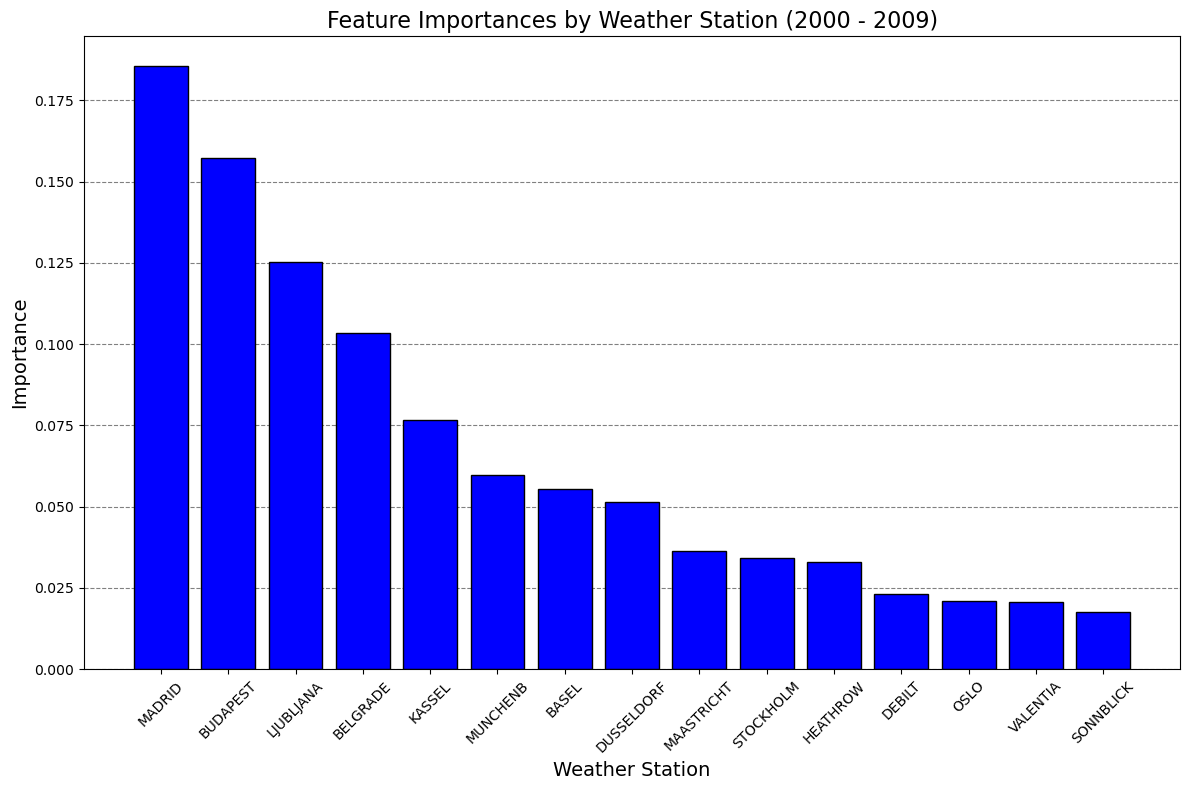

In [29]:
# Plot the importances

importances_plot = plt.figure(figsize=(12, 8))
plt.bar(importance_df['Weather Station'], importance_df['Importance'], color = 'blue', zorder = 2, edgecolor = 'black')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000 - 2009)', fontsize=16)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.tight_layout()
plt.show()

In [30]:
# Save importances_plot
importances_plot.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'feature_importances_2000s.png'),bbox_inches='tight')

## 5. Modeling the 3 Most Influential Weather Stations and Their Features

This section repeats much of the above code but for data relating to **Madrid**, **Budapest**, and **Ljubljana**. Each weather station will get its own random forest model and feature importances plot.

### Madrid

In [31]:
# Filter df_weather to only include Madrid data for all years
X_1 = df_weather[df_weather.columns[df_weather.columns.str.startswith('MADRID')]]
X_1

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                       6             0.92           1.0260   
1                       7             0.86           1.0254   
2                       5             0.90           1.0287   
3                       0             0.75           1.0281   
4                       2             0.64           1.0269   
...                   ...              ...              ...   
22945                   8             0.52           1.0204   
22946                   8             0.51           1.0221   
22947                   8             0.46           1.0186   
22948                   5             0.66           1.0186   
22949                   8             0.82           1.0188   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                         0.53                  0.00              1.4   
1                         0.46                  0.00              0.9   
2                         0.63                  0.00              2.3   
3                         1.16                  0.00              8.7   
4                         1.10                  0.00              7.8   
...                        ...                   ...              ...   
22945                     1.89                  0.12              5.3   
22946                     1.89                  0.12              3.9   
22947                     1.89                  0.12              8.1   
22948                     1.89                  0.12              3.1   
22949                     1.89                  0.12              0.0   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0                   7.6              4.4             10.8  
1                   9.8              7.4             12.2  
2                   8.6              6.4             10.8  
3                  10.3              4.5             16.1  
4                  12.1              8.2             16.0  
...                 ...              ...              ...  
22945              20.0             16.2             23.9  
22946              19.1             14.7             23.5  
22947              19.0             15.4             22.6  
22948              15.7             13.1             18.3  
22949              14.1             12.1             16.1  

[22950 rows x 9 columns]

In [32]:
# Must also filter answers data to only include Madrid
y_1 = df_answers[df_answers.columns[df_answers.columns.str.startswith('MADRID')]]
y_1

MADRID_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0
...                        ...
22945                        0
22946                        0
22947                        0
22948                        0
22949                        0

[22950 rows x 1 columns]

In [33]:
# Ensure correct shape for y
y_1 = y_1.max(axis=1)
print(y_1.shape) # Check new shape - should be (22950, )
print(y_1.unique()) # Check unique values in answers - should be 0 and 1

(22950,)
[0 1]


Shapes of X and y both verified above. Move on to splitting the data into training and testing sets

In [34]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=42)

# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### Random Forest Model

In [35]:
# Create Random Forest Model for Madrid
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth = 3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=3)

In [36]:
# Perform the predictions on the test set
y_pred_1 = clf_1.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", (metrics.accuracy_score(y_test_1, y_pred_1))*100, '%')

Model Accuracy:  99.61659114674103 %


**Note:** Various max depths were trialled to determine how accurate the model could be. After a max depth of 6, the model would predict at 100% accuracy. However, above 99% accuracy was achieved at only a max depth of 3

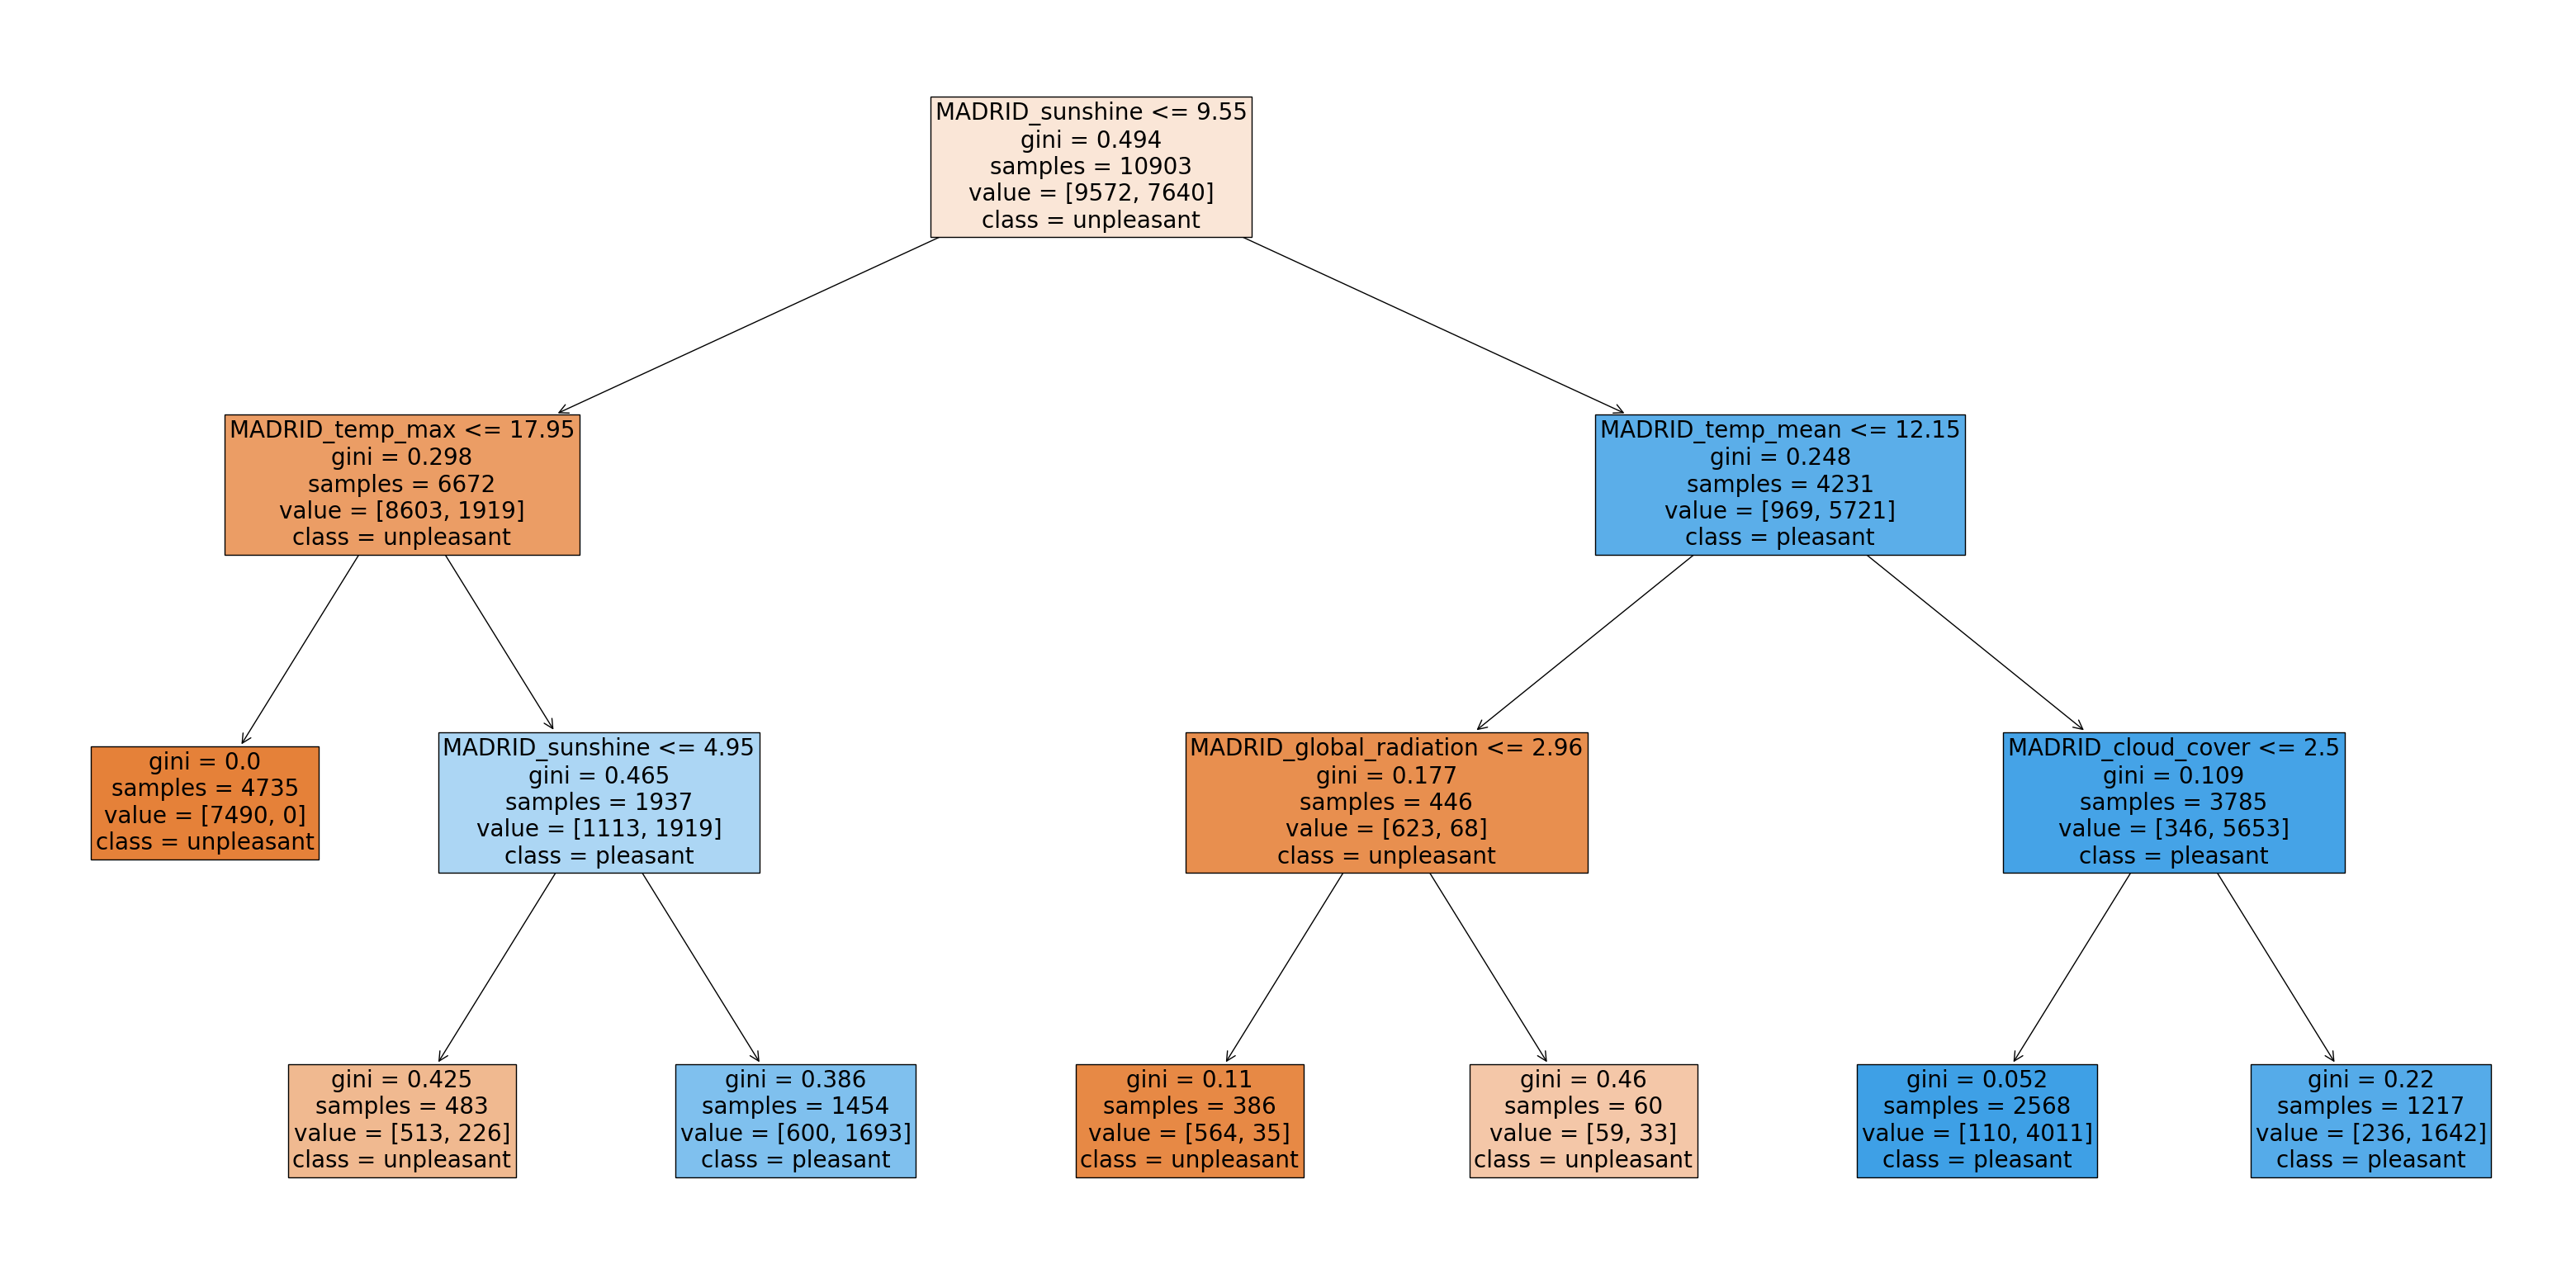

In [37]:
# Plot random forest (Madrid)
Madrid_tree = plt.figure(figsize=(40,20))
plot_tree(clf_1.estimators_[27], fontsize = 20, feature_names = X_1.columns, class_names = class_names, filled = True)
plt.show();

In [38]:
# Save the decision tree for Madrid
Madrid_tree.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Madrid_tree.png'), bbox_inches = 'tight')

#### Feature Importances Madrid

In [39]:
feature_importances_1 = clf_1.feature_importances_
print(feature_importances_1)
print(feature_importances_1.shape)

[0.01802512 0.01335921 0.000881   0.11800923 0.14159208 0.09427742
 0.23949783 0.07541763 0.29894049]
(9,)


In [40]:
# Turn importances into a DataFrame with their associated weather measurments
## Start by creating a list of weather measurements
weather_measurements = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

madrid_importances_df = pd.DataFrame({'Weather Measurement' : weather_measurements, 'Importance' : feature_importances_1}).sort_values(by = 'Importance', ascending = False)
madrid_importances_df

Weather Measurement  Importance
8            temp_max    0.298940
6           temp_mean    0.239498
4       precipitation    0.141592
3    global_radiation    0.118009
5            sunshine    0.094277
7            temp_min    0.075418
0         cloud_cover    0.018025
1            humidity    0.013359
2            pressure    0.000881

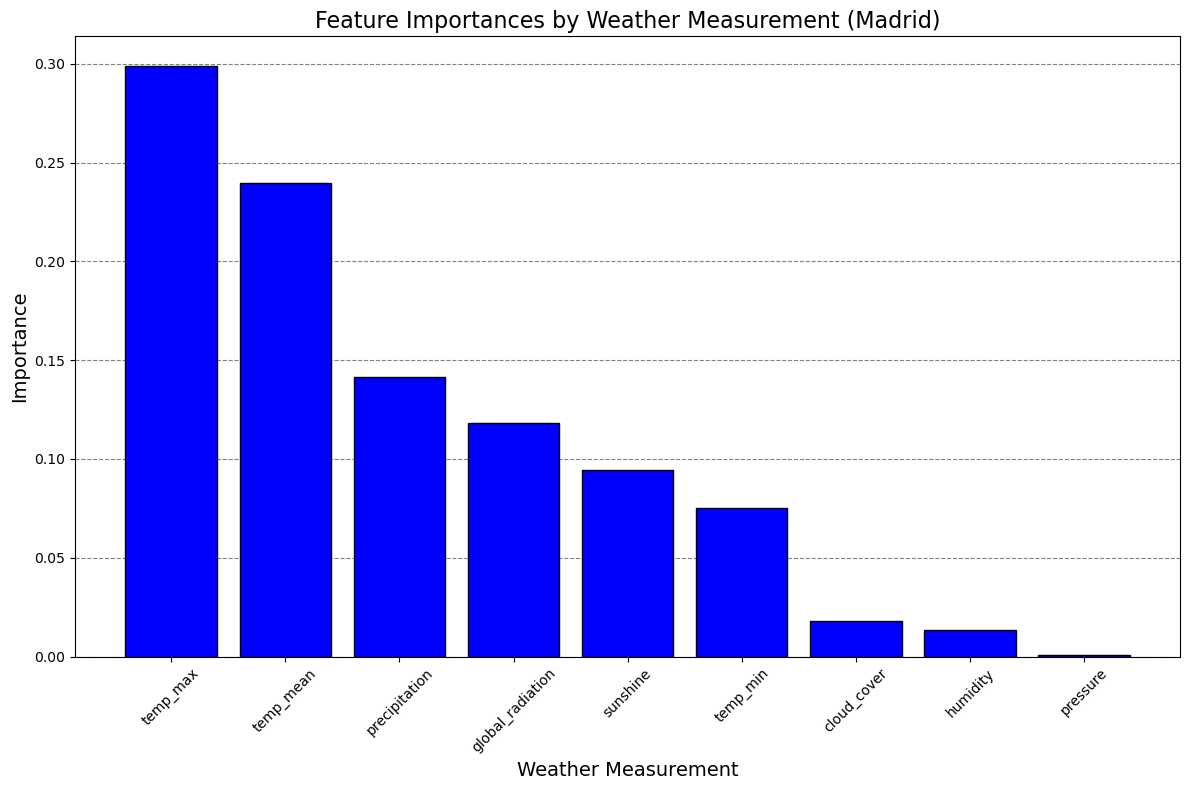

In [41]:
# Plot the importances

madrid_importances_plot = plt.figure(figsize=(12, 8))
plt.bar(madrid_importances_df['Weather Measurement'], madrid_importances_df['Importance'], color = 'blue', zorder = 2, edgecolor = 'black')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Weather Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Measurement (Madrid)', fontsize=16)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.tight_layout()
plt.show()

In [42]:
# Save importances_plot
madrid_importances_plot.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Madrid_Importances_Plot.png'),bbox_inches='tight')

### Budapest

In [43]:
# Filter df_weather to only include Budapest data for all years
X_2 = df_weather[df_weather.columns[df_weather.columns.str.startswith('BUDAPEST')]]
X_2

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                         4               0.67              1.017   
1                         4               0.67              1.017   
2                         4               0.67              1.017   
3                         4               0.67              1.017   
4                         4               0.67              1.017   
...                     ...                ...                ...   
22945                     4               0.67              1.017   
22946                     4               0.67              1.017   
22947                     4               0.67              1.017   
22948                     4               0.67              1.017   
22949                     4               0.67              1.017   

       BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                           0.44                    0.01                2.3   
1                           0.18                    0.31                0.0   
2                           0.30                    0.00                0.6   
3                           0.19                    0.00                0.0   
4                           0.19                    0.00                0.0   
...                          ...                     ...                ...   
22945                       1.41                    0.14                5.4   
22946                       1.41                    0.14                5.4   
22947                       1.41                    0.14                5.4   
22948                       1.41                    0.14                5.4   
22949                       1.41                    0.14                5.4   

       BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                     2.4               -0.4                5.1  
1                     2.3                1.4                3.1  
2                     2.7                1.7                5.3  
3                     2.0                0.4                4.4  
4                     2.5                1.1                5.3  
...                   ...                ...                ...  
22945                11.7                7.9               16.2  
22946                11.7                7.9               16.2  
22947                11.7                7.9               16.2  
22948                11.7                7.9               16.2  
22949                11.7                7.9               16.2  

[22950 rows x 9 columns]

In [44]:
# Must also filter answers data to only include Budapest
y_2 = df_answers[df_answers.columns[df_answers.columns.str.startswith('BUDAPEST')]]
y_2

BUDAPEST_pleasant_weather
0                              0
1                              0
2                              0
3                              0
4                              0
...                          ...
22945                          0
22946                          0
22947                          0
22948                          0
22949                          0

[22950 rows x 1 columns]

In [45]:
# Correct the shape of the answers data
y_2 = y_2.max(axis=1)
print(y_2.shape) # Check new shape - should be (22950, )
print(y_2.unique()) # Check unique values in answers - should be 0 and 1

(22950,)
[0 1]


Shapes of X and y both verified above. Move on to splitting the data into training and testing sets

In [46]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42)

# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### Random Forest Model

In [47]:
# Create Random Forest Model for Budapest
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth = 3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=3)

In [48]:
# Perform the predictions on the test set
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", (metrics.accuracy_score(y_test_2, y_pred_2))*100, '%')

Model Accuracy:  99.79086789822237 %


**Note:** Various max depths were trialled to determine how accurate the model could be. After a max depth of 6, the model would predict at 100% accuracy. However, above 99% accuracy was achieved at only a max depth of 3

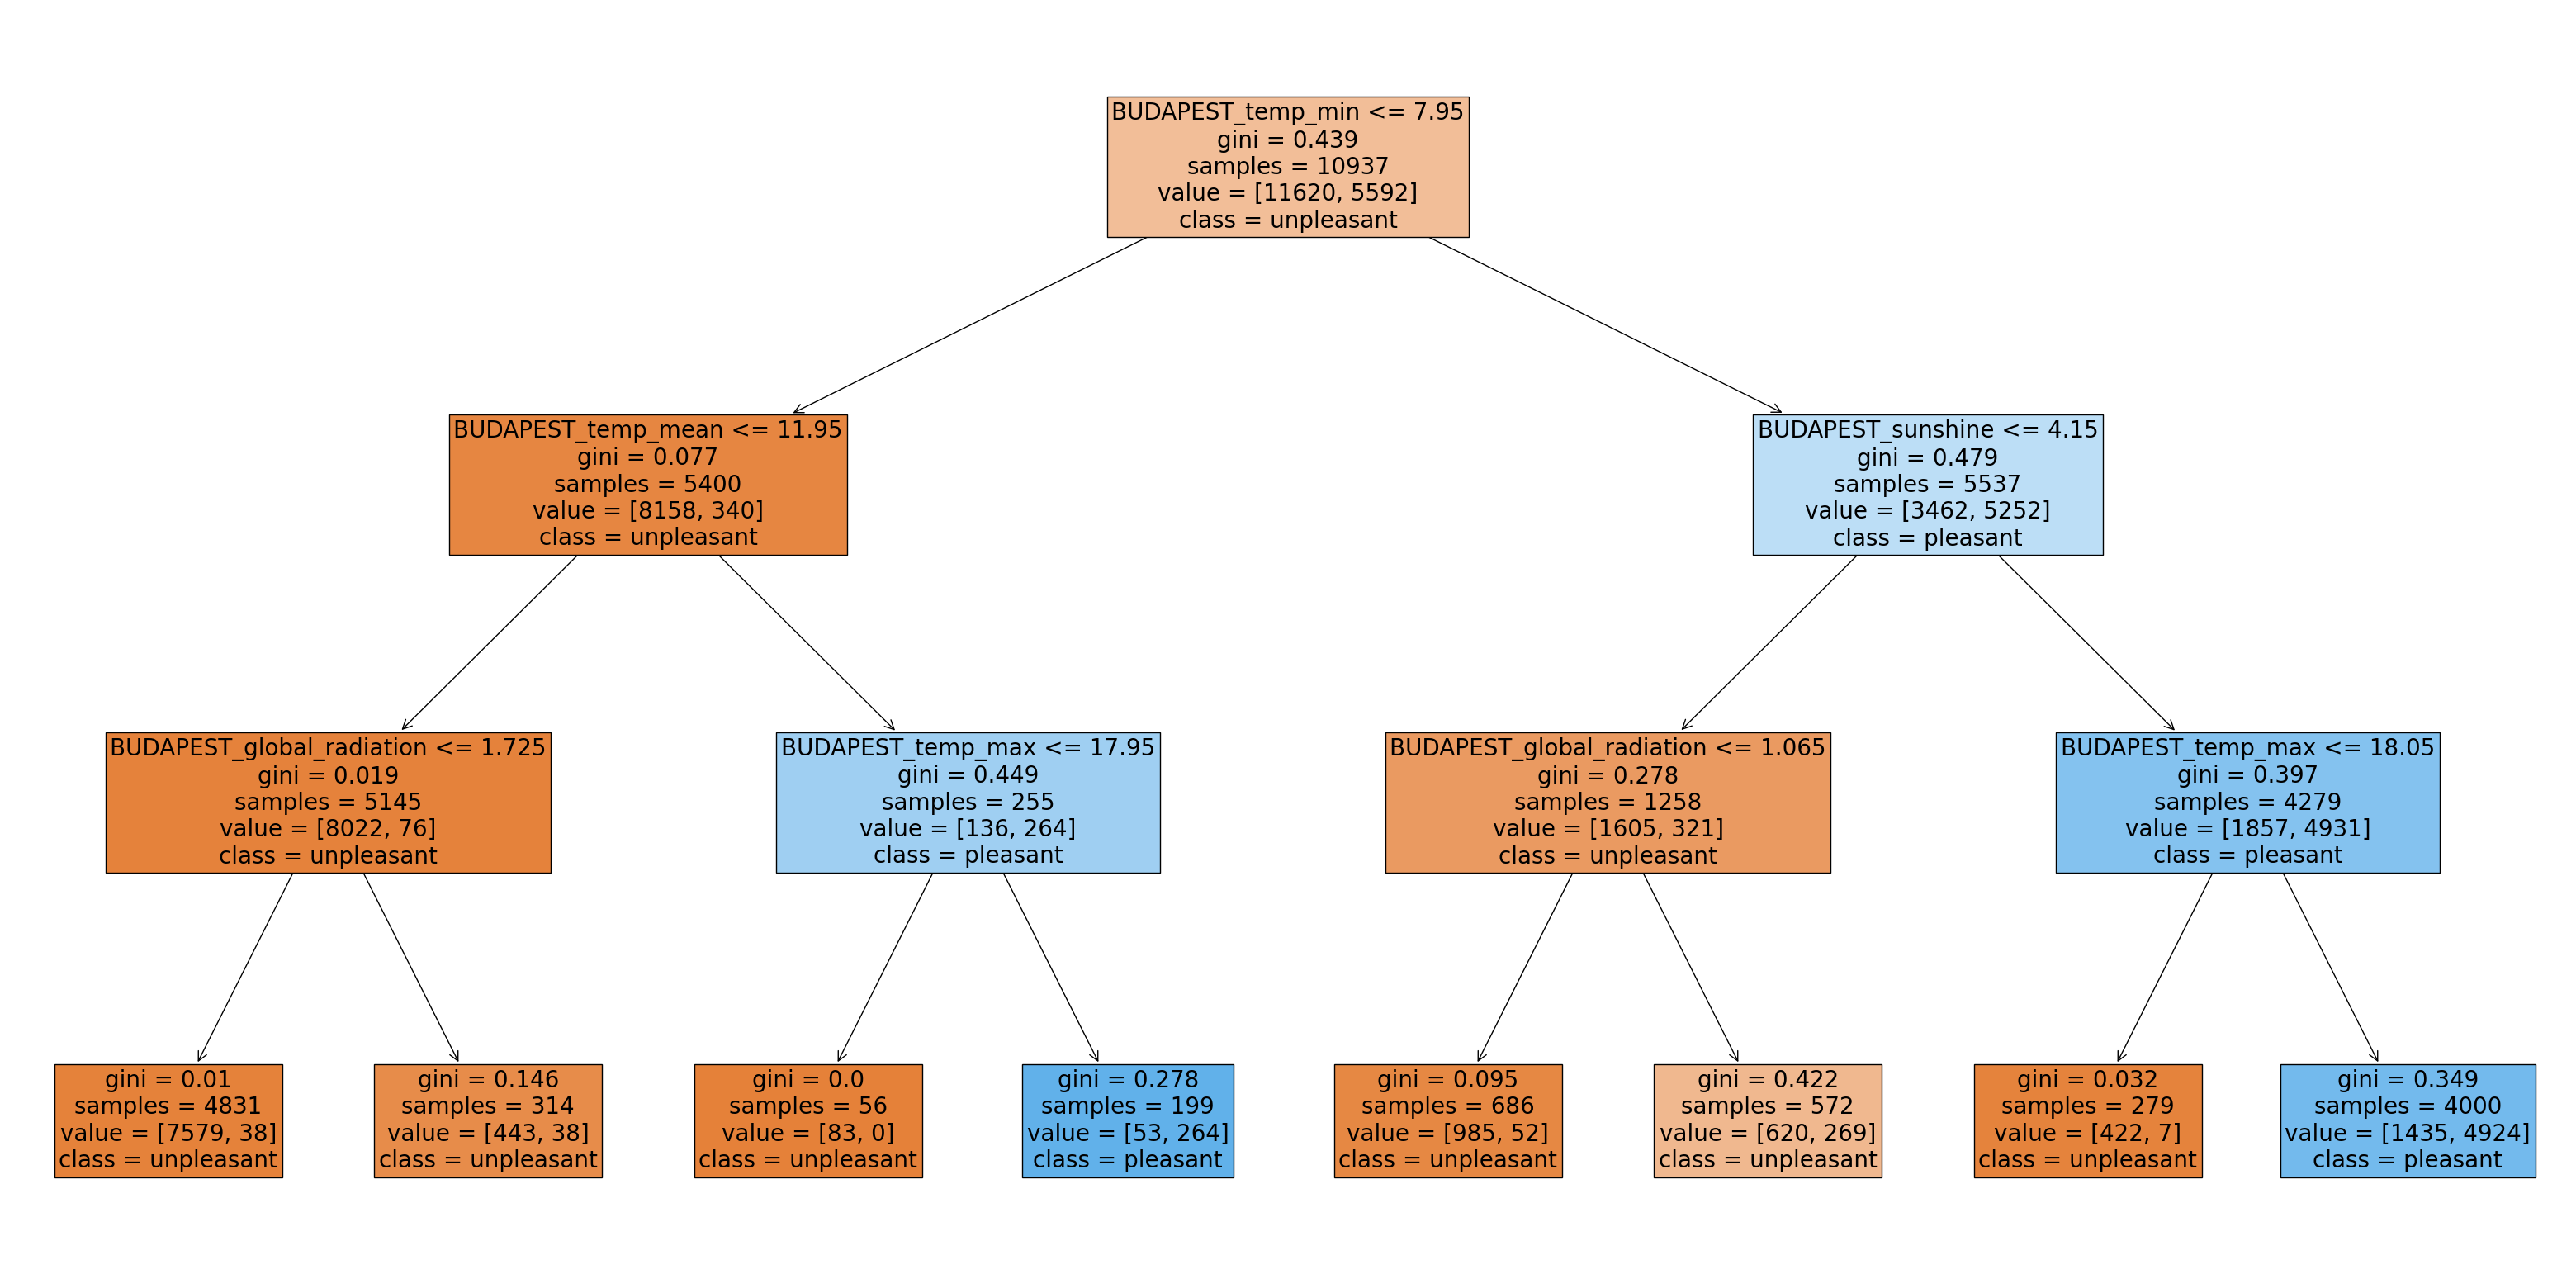

In [49]:
# Plot random forest (Budapest)
Budapest_tree = plt.figure(figsize=(40,20))
plot_tree(clf_2.estimators_[27], fontsize = 20, feature_names = X_2.columns, class_names = class_names, filled = True)
plt.show();

In [50]:
# Save the decision tree for Budapest
Budapest_tree.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Budapest_tree.png'), bbox_inches = 'tight')

#### Feature Importances Budapest

In [51]:
feature_importances_2 = clf_2.feature_importances_
print(feature_importances_2)
print(feature_importances_2.shape)

[0.01291249 0.00461659 0.00139942 0.05202028 0.21565944 0.07575546
 0.26966783 0.07322303 0.29474546]
(9,)


In [52]:
# Turn importances into a DataFrame with their associated weather measurments

budapest_importances_df = pd.DataFrame({'Weather Measurement' : weather_measurements, 'Importance' : feature_importances_2}).sort_values(by = 'Importance', ascending = False)
budapest_importances_df

Weather Measurement  Importance
8            temp_max    0.294745
6           temp_mean    0.269668
4       precipitation    0.215659
5            sunshine    0.075755
7            temp_min    0.073223
3    global_radiation    0.052020
0         cloud_cover    0.012912
1            humidity    0.004617
2            pressure    0.001399

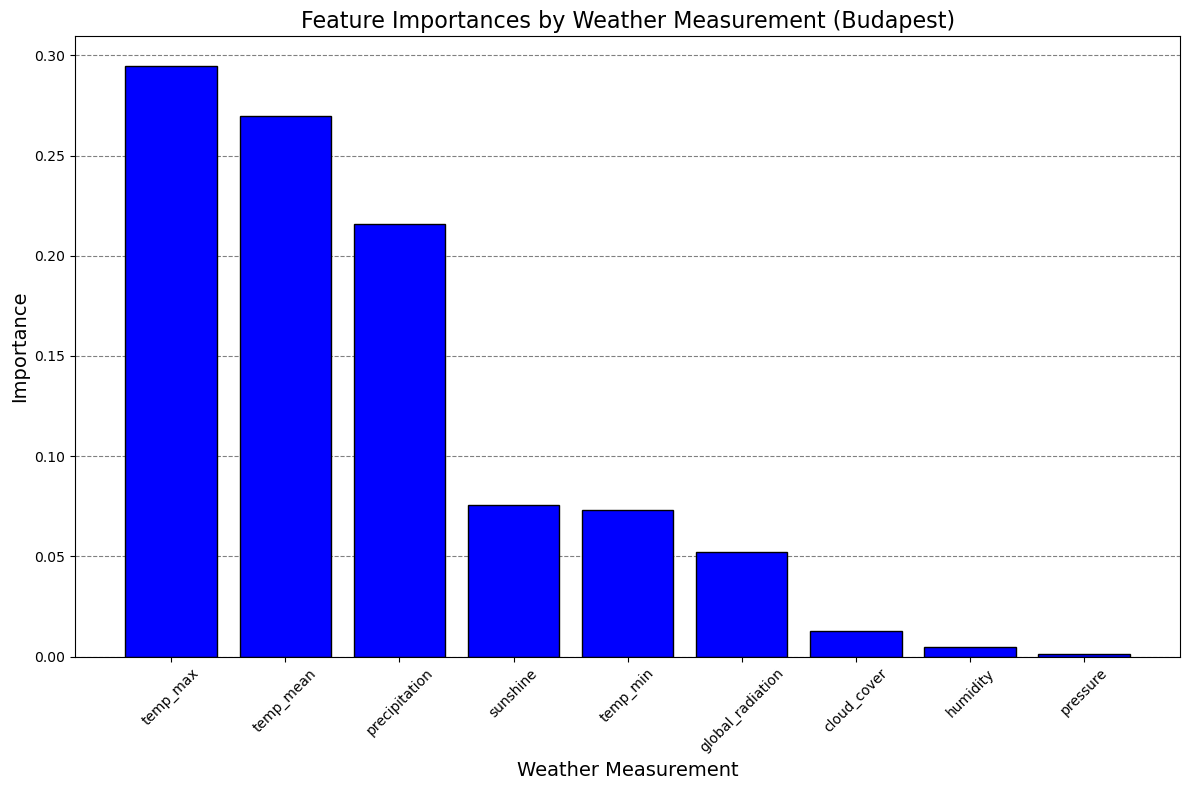

In [53]:
# Plot the importances

budapest_importances_plot = plt.figure(figsize=(12, 8))
plt.bar(budapest_importances_df['Weather Measurement'], budapest_importances_df['Importance'], color = 'blue', zorder = 2, edgecolor = 'black')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Weather Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Measurement (Budapest)', fontsize=16)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.tight_layout()
plt.show()

In [54]:
# Save importances_plot
budapest_importances_plot.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Budapest_Importances_Plot.png'),bbox_inches='tight')

### Ljubljana

In [67]:
# Filter df_weather to only include Ljubljana data for all years
X_3 = df_weather[df_weather.columns[df_weather.columns.str.startswith('LJUBLJANA')]]
X_3

LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                          8                1.00              1.0173   
1                          6                0.94              1.0173   
2                          8                0.96              1.0173   
3                          6                0.94              1.0173   
4                          7                0.94              1.0173   
...                      ...                 ...                 ...   
22945                      4                0.80              1.0289   
22946                      3                0.82              1.0291   
22947                      3                0.81              1.0270   
22948                      3                0.77              1.0238   
22949                      3                0.77              1.0114   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
0                            0.20                     0.00   
1                            0.56                     0.13   
2                            0.20                     0.12   
3                            0.49                     0.00   
4                            0.20                     0.00   
...                           ...                      ...   
22945                        1.35                     0.37   
22946                        1.35                     0.37   
22947                        1.35                     0.37   
22948                        1.35                     0.37   
22949                        1.35                     0.37   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
0                     0.0                 -0.6                -1.9   
1                     3.2                  2.1                -1.3   
2                     0.0                  4.6                 0.9   
3                     2.2                  3.2                 1.0   
4                     0.0                  3.6                 0.4   
...                   ...                  ...                 ...   
22945                 5.9                 14.7                12.1   
22946                 4.5                 12.9                 9.8   
22947                 5.1                 13.2                10.2   
22948                 5.7                 14.0                10.0   
22949                 6.3                 13.6                 8.8   

       LJUBLJANA_temp_max  
0                     0.5  
1                     5.5  
2                     6.3  
3                     7.0  
4                     4.8  
...                   ...  
22945                21.1  
22946                19.8  
22947                20.7  
22948                23.1  
22949                23.4  

[22950 rows x 9 columns]

In [68]:
# Must also filter answers data to only include Ljubljana
y_3 = df_answers[df_answers.columns[df_answers.columns.str.startswith('LJUBLJANA')]]
y_3

LJUBLJANA_pleasant_weather
0                               0
1                               0
2                               0
3                               0
4                               0
...                           ...
22945                           0
22946                           0
22947                           0
22948                           0
22949                           0

[22950 rows x 1 columns]

In [69]:
# Correct the shape of the answers data
y_3 = y_3.max(axis=1)
print(y_3.shape) # Check new shape - should be (22950, )
print(y_3.unique()) # Check unique values in answers - should be 0 and 1

(22950,)
[0 1]


Shapes of X and y both verified above. Move on to splitting the data into training and testing sets

In [70]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=42)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


#### Random Forest Model

In [71]:
# Create Random Forest Model for Ljubljana
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth = 3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [72]:
# Perform the predictions on the test set
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", (metrics.accuracy_score(y_test_3, y_pred_3))*100, '%')

Model Accuracy:  99.86057859881493 %


**Note:** Various max depths were trialled to determine how accurate the model could be. After a max depth of 5, the model would predict at 100% accuracy. However, above 99% accuracy was achieved at only a max depth of 2

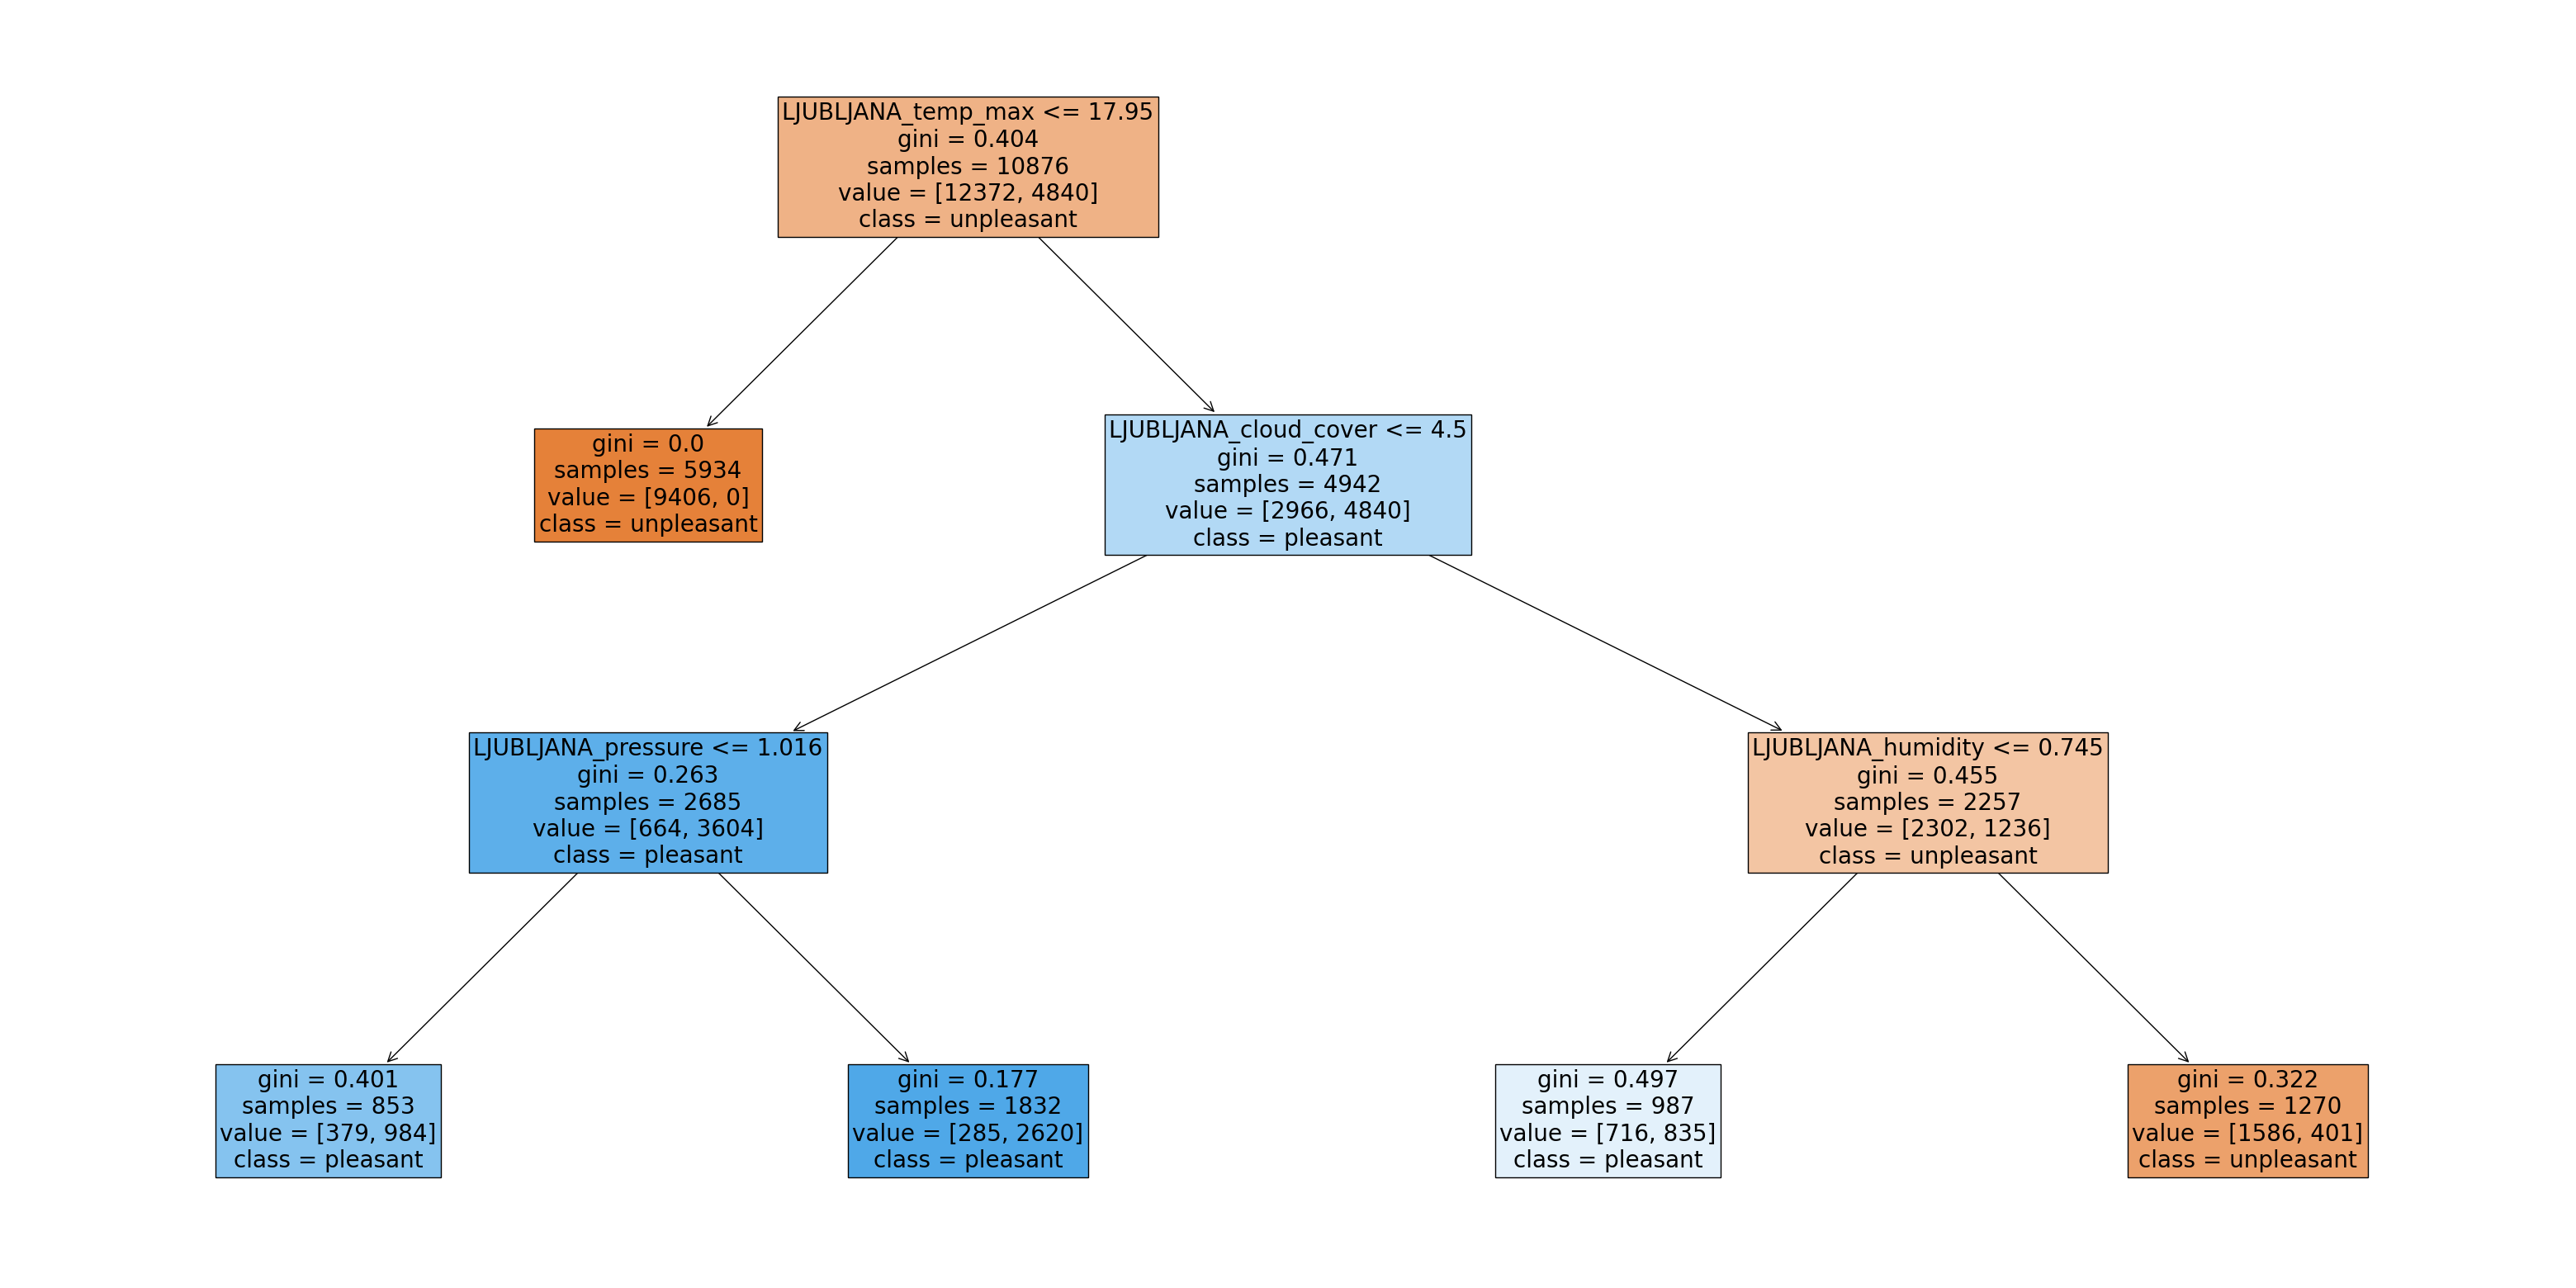

In [73]:
# Plot random forest (Ljubljana)
Ljubljana_tree = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[27], fontsize = 20, feature_names = X_3.columns, class_names = class_names, filled = True)
plt.show();

In [74]:
# Save the decision tree for Belgrade
Ljubljana_tree.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Ljubljana_tree.png'), bbox_inches = 'tight')

#### Feature Importances Ljubljana

In [75]:
feature_importances_3 = clf_3.feature_importances_
print(feature_importances_3)
print(feature_importances_3.shape)

[0.04633174 0.01270573 0.00493758 0.10739211 0.24910887 0.11773821
 0.14098378 0.01816571 0.30263626]
(9,)


In [76]:
# Turn importances into a DataFrame with their associated weather measurments

Ljubljana_importances_df = pd.DataFrame({'Weather Measurement' : weather_measurements, 'Importance' : feature_importances_3}).sort_values(by = 'Importance', ascending = False)
Ljubljana_importances_df

Weather Measurement  Importance
8            temp_max    0.302636
4       precipitation    0.249109
6           temp_mean    0.140984
5            sunshine    0.117738
3    global_radiation    0.107392
0         cloud_cover    0.046332
7            temp_min    0.018166
1            humidity    0.012706
2            pressure    0.004938

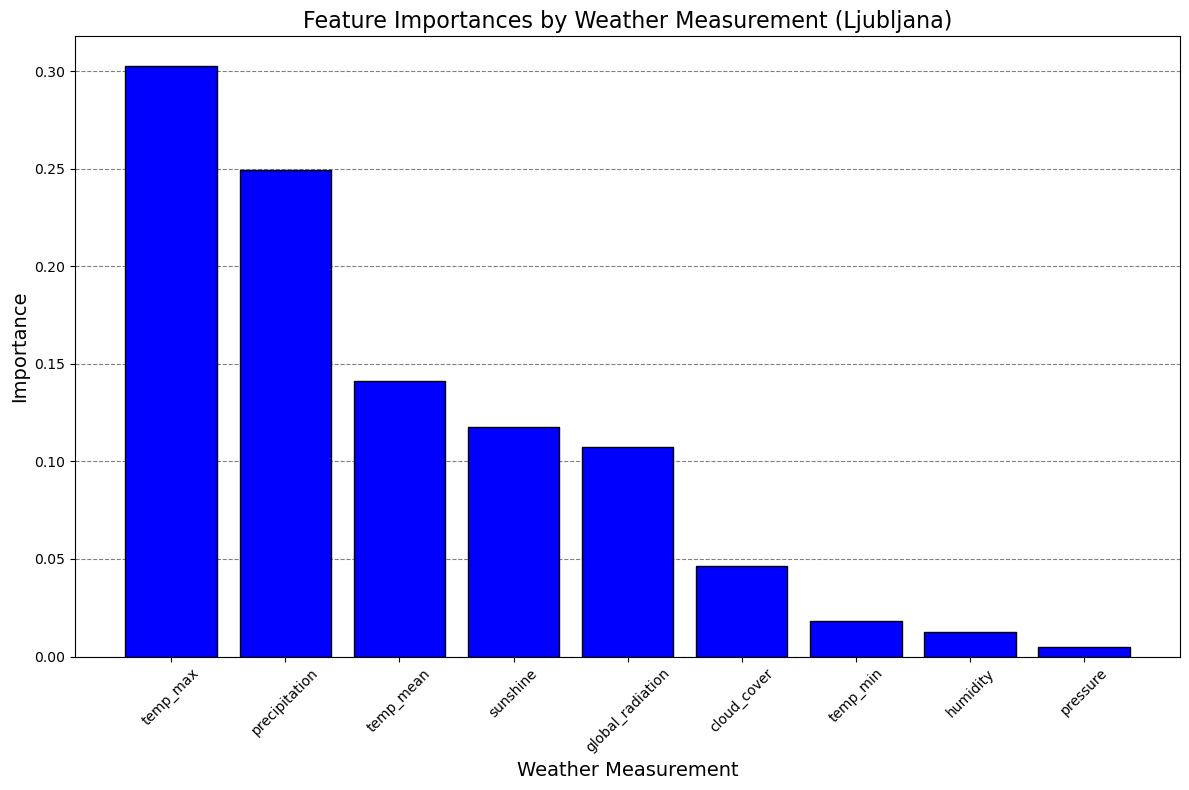

In [77]:
# Plot the importances

Ljubljana_importances_plot = plt.figure(figsize=(12, 8))
plt.bar(Ljubljana_importances_df['Weather Measurement'], Ljubljana_importances_df['Importance'], color = 'blue', zorder = 2, edgecolor = 'black')
plt.xticks(rotation = 45, ha = 'center')
plt.xlabel('Weather Measurement', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Measurement (Ljubljana)', fontsize=16)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.tight_layout()
plt.show()

In [78]:
# Save importances_plot
Ljubljana_importances_plot.savefig(os.path.join(path, '04 Analysis', 'Random Forests', 'Ljubljana_Importances_Plot.png'),bbox_inches='tight')